In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
color = sns.color_palette()

In [2]:
# train and test split
df = pd.read_csv("../data/train_2016_v2.csv", parse_dates=["transactiondate"])
# df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [3]:
print(df.shape)
# print(df_train.shape)
# print(df_test.shape)

(90275, 3)


# Analyze target variable - logerror

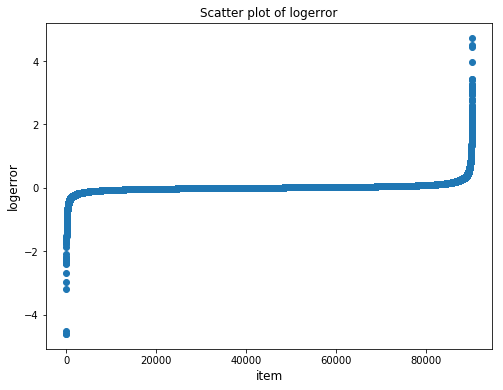

In [4]:
# scatter plot
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df['logerror'].values))
plt.xlabel('item', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.title('Scatter plot of logerror')
plt.show()

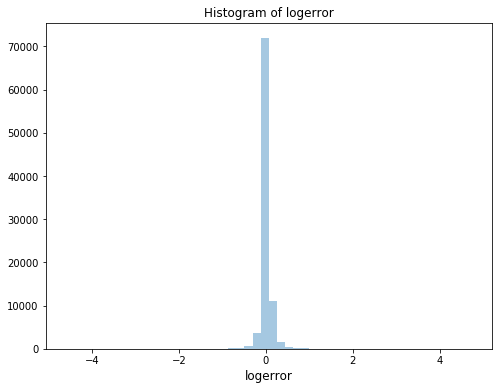

In [5]:
# histogram plot
plt.figure(figsize=(8, 6))
sns.distplot(df['logerror'].values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.title('Histogram of logerror')
plt.show()

In [96]:
# get the 95% and 5% value and count outliers
ub = np.percentile(df.logerror.values, 95)
lb = np.percentile(df.logerror.values, 5)
high = df[(df['logerror'] > ub)]
low = df[df['logerror'] < lb]
print("upper", ub)
print("lower", lb)
print(high.shape, low.shape)

upper 0.1647
lower -0.1267
(0, 4) (0, 4)


In [7]:
# set 95% and 5% as outliers and set logerror as ub or lb
df['logerror'][df['logerror'] > ub] = ub
df['logerror'][df['logerror'] < lb] = lb

# df_test['logerror'][df_test['logerror'] > ub] = ub
# df_test['logerror'][df_test['logerror'] < lb] = lb

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


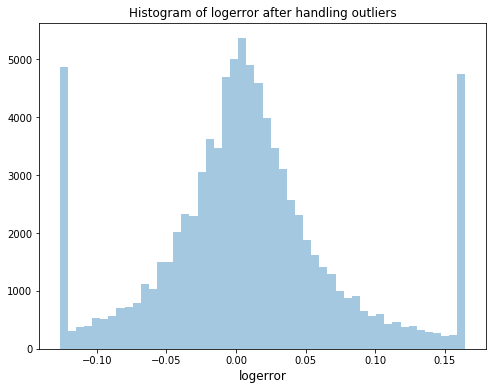

In [8]:
# histogram plot after handling outliers
plt.figure(figsize=(8, 6))
sns.distplot(df['logerror'].values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.title('Histogram of logerror after handling outliers')
plt.show()

# plt.figure(figsize=(8, 6))
# sns.distplot(df_test['logerror'].values, bins=50, kde=False)
# plt.xlabel('logerror', fontsize=12)
# plt.title('Histogram of logerror after handling outliers')
# plt.show()

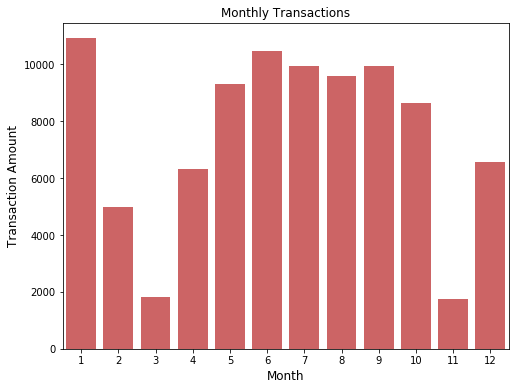

In [9]:
# train
# Transactions
df['transaction_month'] = df['transactiondate'].dt.month
monthly_transaction = df['transaction_month'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(df['transaction_month'].unique(), monthly_transaction.values, alpha=0.8, color=color[3])
# plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.title('Monthly Transactions')
plt.show()

# test
# Transactions
# df_test['transaction_month'] = df_test['transactiondate'].dt.month
# monthly_transaction = df_test['transaction_month'].value_counts()

# plt.figure(figsize=(8,6))
# sns.barplot(df_test['transaction_month'].unique(), monthly_transaction.values, alpha=0.8, color=color[3])
# # plt.xticks(rotation='vertical')
# plt.xlabel('Month', fontsize=12)
# plt.ylabel('Transaction Amount', fontsize=12)
# plt.title('Monthly Transactions')
# plt.show()

In [10]:
# Parcel ID
# train
print((df['parcelid'].value_counts().reset_index())['parcelid'].value_counts())
# test
# print((df_test['parcelid'].value_counts().reset_index())['parcelid'].value_counts())

1    90026
2      123
3        1
Name: parcelid, dtype: int64


# Merge transaction df and property feature df

In [11]:
# Property file (w/ all features)
df_property = pd.read_csv("../data/properties_2016.csv")
df_property.shape

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [33]:
# Merge df and property file
data = pd.merge(df, df_property, on='parcelid', how='left')
print(data.shape)

# Merge test and property file
# test_data = pd.merge(df_test, df_property, on='parcelid', how='left')
# print(test_data.shape)

(90275, 61)


# Missing Values

In [34]:
# missing values
# train
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['covariate', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / data.shape[0]
missing_df = missing_df.sort_values(['missing_ratio'],ascending=False)
print(missing_df[missing_df['missing_ratio']>0.9])
print()
# test
# missing_df_test = test_data.isnull().sum(axis=0).reset_index()
# missing_df_test.columns = ['covariate', 'missing_count']
# missing_df_test['missing_ratio'] = missing_df_test['missing_count'] / test_data.shape[0]
# missing_df_test = missing_df_test.sort_values(['missing_ratio'],ascending=False)
# print(missing_df_test[missing_df_test['missing_ratio']>0.9])

                   covariate  missing_count  missing_ratio
9        buildingclasstypeid          90259       0.999823
16      finishedsquarefeet13          90242       0.999634
6               basementsqft          90232       0.999524
44               storytypeid          90232       0.999524
49        yardbuildingsqft26          90180       0.998948
52             fireplaceflag          90053       0.997541
5   architecturalstyletypeid          90014       0.997109
46    typeconstructiontypeid          89976       0.996688
19       finishedsquarefeet6          89854       0.995336
12                decktypeid          89617       0.992711
31               poolsizesum          89306       0.989266
32              pooltypeid10          89114       0.987139
33               pooltypeid2          89071       0.986663
58        taxdelinquencyflag          88492       0.980249
59        taxdelinquencyyear          88492       0.980249
25            hashottuborspa          87910       0.9738

In [35]:
print(missing_df[missing_df['missing_ratio']>0.9].shape)
# print(missing_df_test[missing_df_test['missing_ratio']>0.9].shape)

(20, 3)


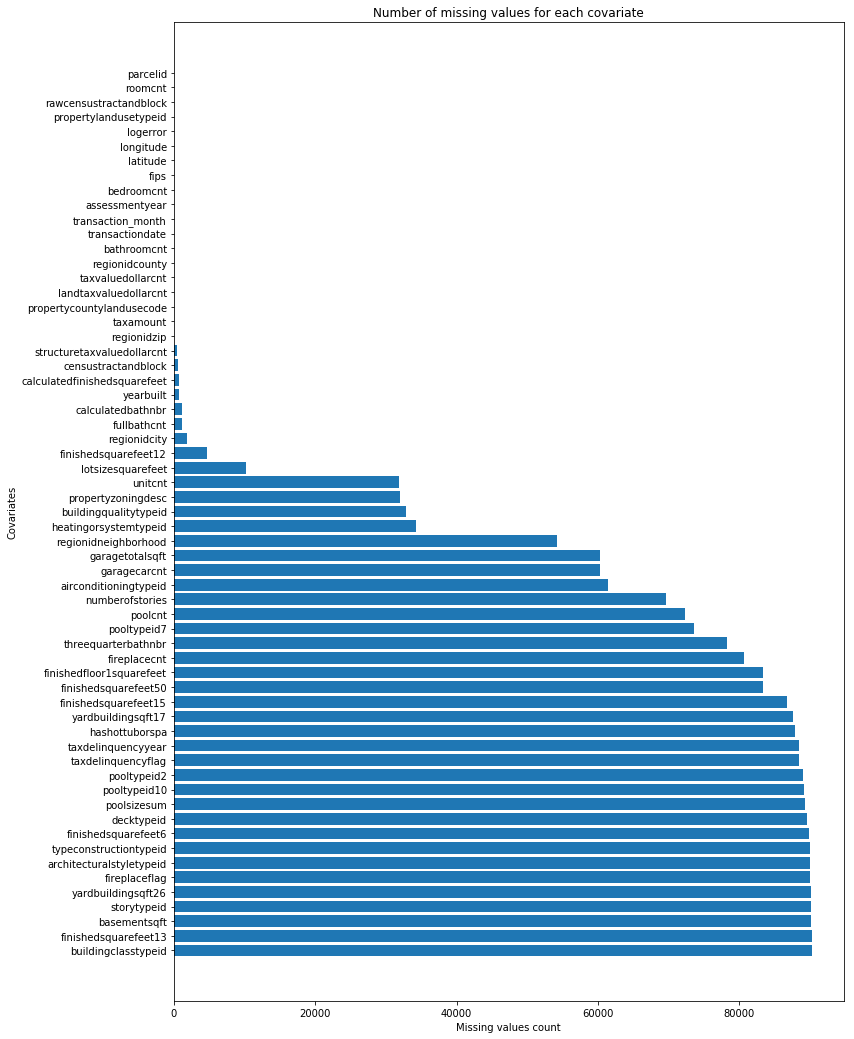

In [36]:
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(np.arange(missing_df.shape[0]), missing_df.missing_count.values)

ax.set_xlabel("Missing values count")
ax.set_yticks(np.arange(missing_df.shape[0]))
ax.set_yticklabels(missing_df.covariate.values, rotation='horizontal')
ax.set_ylabel("Covariates")
ax.set_title("Number of missing values for each covariate")
plt.show()

In [37]:
# drop the ones with almost all null values
drop_columns = missing_df[missing_df['missing_ratio'] > 0.9].covariate
data = data.drop(columns=drop_columns)

# test
# drop_columns_test = missing_df_test[missing_df_test['missing_ratio'] > 0.9].covariate
# test_data = test_data.drop(columns=drop_columns_test)

In [38]:
# drop propertycountylandusecode, propertyzoningdesc, regionidcity, regionidneighborhood, regionidzip
drop_columns = ['propertycountylandusecode', 'propertyzoningdesc', 'regionidcity', 'regionidneighborhood', 'regionidzip']
data = data.drop(columns=drop_columns)
# test_data = test_data.drop(columns=drop_columns)

In [39]:
# Check data type and convert
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Column", "Column Type"]
print(dtype_df)
print()
# test
# dtype_df_test = test_data.dtypes.reset_index()
# dtype_df_test.columns = ["Column", "Column Type"]
# print(dtype_df_test)

                          Column     Column Type
0                       parcelid           int64
1                       logerror         float64
2                transactiondate  datetime64[ns]
3              transaction_month           int64
4          airconditioningtypeid         float64
5                    bathroomcnt         float64
6                     bedroomcnt         float64
7          buildingqualitytypeid         float64
8              calculatedbathnbr         float64
9   calculatedfinishedsquarefeet         float64
10          finishedsquarefeet12         float64
11                          fips         float64
12                  fireplacecnt         float64
13                   fullbathcnt         float64
14                  garagecarcnt         float64
15               garagetotalsqft         float64
16         heatingorsystemtypeid         float64
17                      latitude         float64
18                     longitude         float64
19             lotsi

In [67]:
columns_to_convert = ['airconditioningtypeid', 'buildingqualitytypeid', 'heatingorsystemtypeid','pooltypeid7',
                     'propertylandusetypeid', 'regionidcounty']
for col in columns_to_convert:
    data[col] = data[col].astype(object)
#     test_data[col] = test_data[col].astype(object)

In [68]:
# impute mean to missing values for numerical columns
numeric_column = [col for col in data.columns if data[col].dtype=='float64']
mean_val_numeric = data[numeric_column].mean(axis=0)

for i, col in enumerate(numeric_column):
    data[col].fillna(value=mean_val_numeric[i], inplace=True)
#     test_data[col].fillna(value=mean_val_numeric[i], inplace=True)

In [69]:
print(len(numeric_column))

27


In [74]:
# impute majority value to missing values for categorical columns
# train
cate_column = [col for col in data.columns if data[col].dtype=='object']
for i, col in enumerate(cate_column):
    frequentist = data.groupby([col]).count().sort_values(['parcelid'], 
                                                                  ascending=False).reset_index().iloc[0][col]

    data.fillna(frequentist, inplace=True)
#     test_data.fillna(frequentist, inplace=True)
    print(col, len(data[col].unique()))
#     print('test', col, len(test_data[col].unique()))

for col in columns_to_convert:
    data[col] = data[col].astype(object)
# data[columns_to_convert] = data[columns_to_convert].astype(object)

# test
# cate_column_test = [col for col in test_data.columns if test_data[col].dtype=='object']
# for i, col in enumerate(cate_column_test):
#     frequentist = test_data.groupby([col]).count().sort_values(['parcelid'], 
#                                                                   ascending=False).reset_index().iloc[0][col]

#     test_data.fillna(frequentist, inplace=True)
#     print('test', col, len(test_data[col].unique()))

# test_data[cate_column_test] = test_data[cate_column_test].astype(object)

In [79]:
data.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,...,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,2016-01-01,1,1,2.0,3.0,4,2.0,1684.0,...,1.008743,1.000000,1959.0,1.440739,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,14366692,-0.1267,2016-01-01,1,1,3.5,4.0,1,3.5,2263.0,...,1.000000,1.110414,2014.0,1.440739,346458.0,585529.0,2015.0,239071.0,10153.02,6.049151e+13
2,12098116,-0.0040,2016-01-01,1,1,3.0,2.0,4,3.0,2217.0,...,1.008743,1.000000,1940.0,1.440739,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1,2.0,2.0,4,2.0,839.0,...,1.008743,1.000000,1987.0,1.440739,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,1,2.5,4.0,1,2.5,2283.0,...,1.000000,1.110414,1981.0,2.000000,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13


In [78]:
cate_column = [col for col in data.columns if data[col].dtype=='object']
print(len(cate_column))

6


# Variable transform

In [80]:
# convert categorical variable to dummy variables
data = pd.get_dummies(data)
# test_data = pd.get_dummies(test_data)

In [81]:
# covariate with only one value 
one_value_columns = []
for col in data.columns: 
    if len(data[col].unique()) == 1:
        one_value_columns.append(col)

# drop
data = data.drop(columns=one_value_columns)
# test_data = test_data.drop(columns=one_value_columns)

In [82]:
print(data.columns)
# print(test_data.columns)

Index(['parcelid', 'logerror', 'transactiondate', 'transaction_month',
       'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'latitude', 'longitude', 'lotsizesquarefeet', 'rawcensustractandblock',
       'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock',
       'airconditioningtypeid_1.0', 'airconditioningtypeid_3.0',
       'airconditioningtypeid_5.0', 'airconditioningtypeid_9.0',
       'airconditioningtypeid_11.0', 'airconditioningtypeid_13.0',
       'buildingqualitytypeid_1.0', 'buildingqualitytypeid_4.0',
       'buildingqualitytypeid_6.0', 'buildingqualitytypeid_7.0',
       'buildingqualitytypeid_8.0', 'buildingqualitytypeid_10.0',
       'buildingqualitytypeid_11.0', 'building

In [83]:
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Column", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Column
0,int64,2
1,float64,25
2,datetime64[ns],1
3,uint8,43


In [57]:
# dtype_df_test = test_data.dtypes.reset_index()
# dtype_df_test.columns = ["Column", "Column Type"]
# dtype_df_test.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Column
0,int64,2
1,float64,25
2,datetime64[ns],1
3,uint8,37


# Correlation study on numerical variables

In [84]:
# Correlation coefficient of each of numeric covariates with logerror
x_numeric = [col for col in data.columns if col not in ['logerror'] if data[col].dtype=='float64']

labels = []
values = []
for col in x_numeric:
    labels.append(col)
    values.append(np.corrcoef(data[col].values, data.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

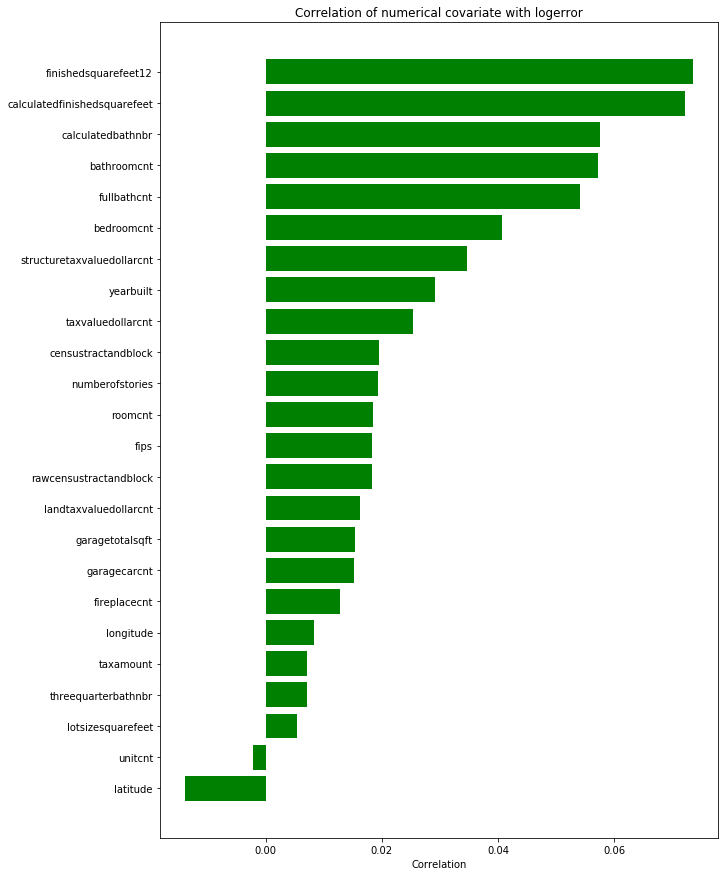

In [85]:
width = 0.9
fig, ax = plt.subplots(figsize=(10, 15))
rects = ax.barh(np.arange(len(labels)), np.array(corr_df.corr_values.values), color='green')
ax.set_xlabel("Correlation")
ax.set_title("Correlation of numerical covariate with logerror")
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
plt.show()
# we found low correlation in general

In [86]:
# correlation between covariates which have high correlation w/ logerrir
corr_df_sel = corr_df[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
10,latitude,-0.013804
20,taxvaluedollarcnt,0.025405
17,yearbuilt,0.029131
19,structuretaxvaluedollarcnt,0.034692
1,bedroomcnt,0.040753
7,fullbathcnt,0.054061
0,bathroomcnt,0.057267
2,calculatedbathnbr,0.057491
3,calculatedfinishedsquarefeet,0.072220
4,finishedsquarefeet12,0.073463


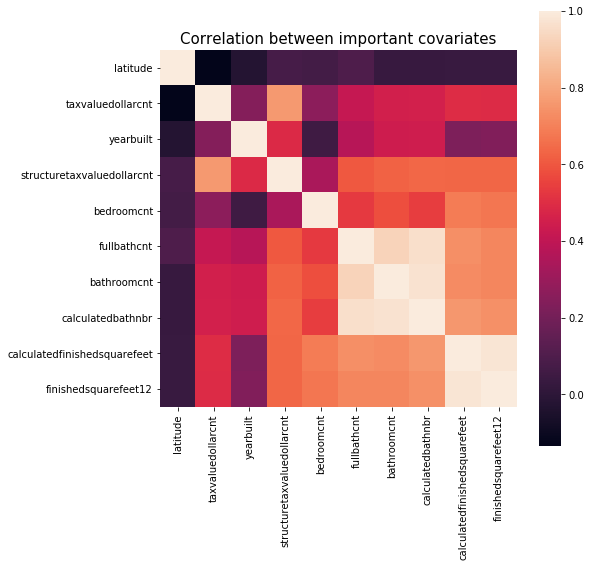

In [87]:
cols_to_include = corr_df_sel.col_labels.tolist()

temp_data = data[cols_to_include]
corrmat = temp_data.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Correlation between important covariates", fontsize=15)
plt.show()

# some highly correlated covariates
# bedroomcnt, fullbathcn, calculatedbathnbr, bathroomcnt, claculatedfinishedsquarefeet, finishedsquarefeet12, taxamount

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

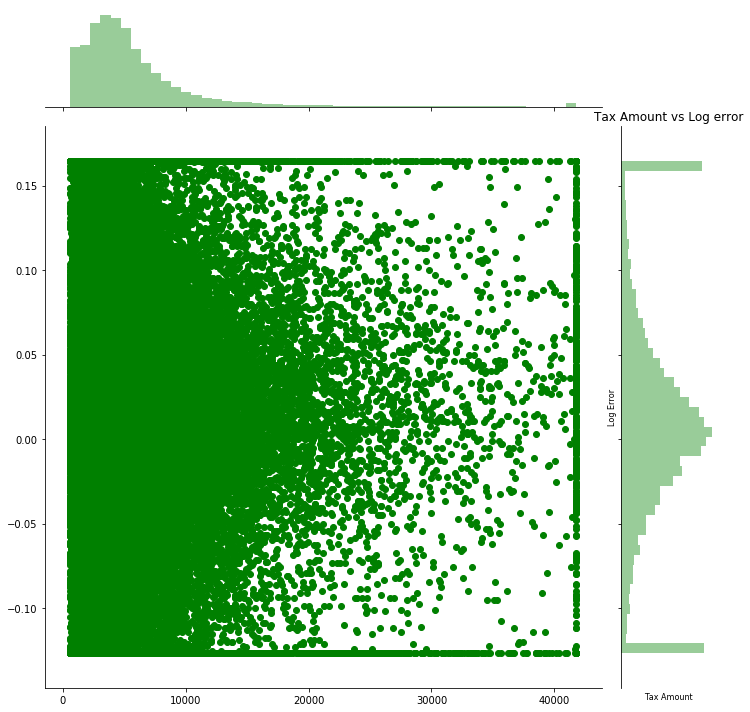

In [89]:
# highly correlated covariates
# claculatedfinishedsquarefeet, finishedsquarefeet12, taxamount
col = "taxamount"
ulimit = np.percentile(data[col].values, 99.5)
llimit = np.percentile(data[col].values, 0.5)
data[col][data[col] > ulimit] = ulimit
data[col][data[col] < llimit] = llimit

plt.figure(figsize=(8, 8))
sns.jointplot(x=data['taxamount'].values, y=data['logerror'].values, size=10, color='g')
plt.ylabel('Log Error', fontsize=8)
plt.xlabel('Tax Amount', fontsize=8)
plt.title("Tax Amount vs Log error", fontsize=12)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<Figure size 576x576 with 0 Axes>

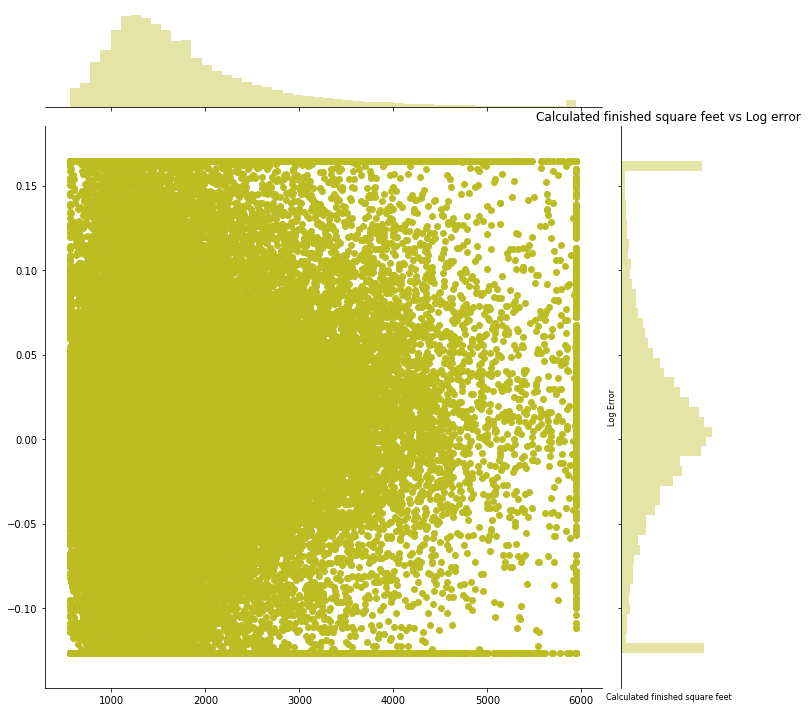

In [90]:
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(data[col].values, 99.5)
llimit = np.percentile(data[col].values, 0.5)
data[col][data[col] > ulimit] = ulimit
data[col][data[col] < llimit] = llimit

plt.figure(figsize=(8,8))
sns.jointplot(x=data.calculatedfinishedsquarefeet.values, y=data.logerror.values, size=10, color=color[8])
plt.ylabel('Log Error', fontsize=8)
plt.xlabel('Calculated finished square feet', fontsize=8)
plt.title("Calculated finished square feet vs Log error", fontsize=12)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<Figure size 576x576 with 0 Axes>

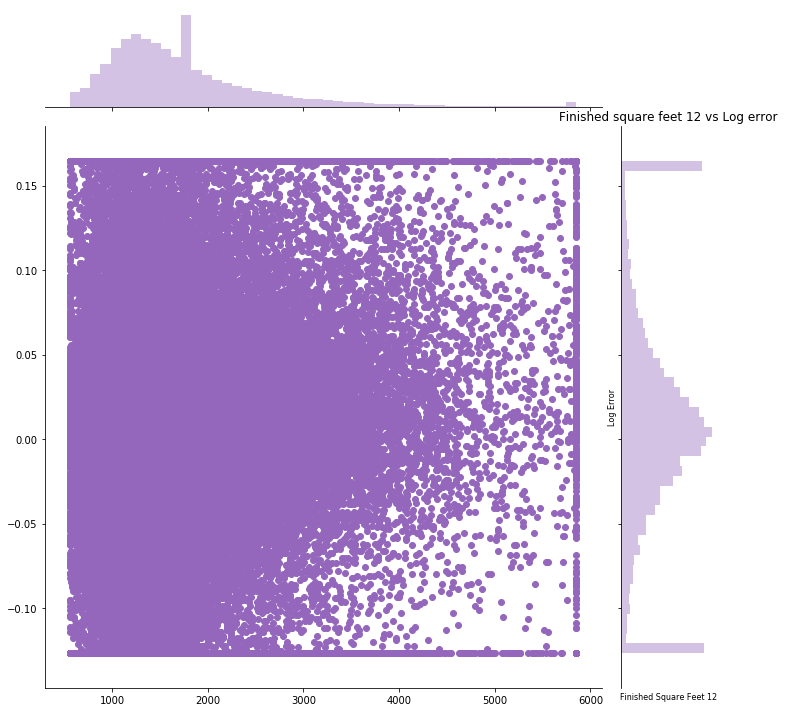

In [91]:
col = "finishedsquarefeet12"
ulimit = np.percentile(data[col].values, 99.5)
llimit = np.percentile(data[col].values, 0.5)
data[col][data[col]>ulimit] = ulimit
data[col][data[col]<llimit] = llimit

plt.figure(figsize=(8,8))
sns.jointplot(x=data.finishedsquarefeet12.values, y=data.logerror.values, size=10, color=color[4])
plt.ylabel('Log Error', fontsize=8)
plt.xlabel('Finished Square Feet 12', fontsize=8)
plt.title("Finished square feet 12 vs Log error", fontsize=12)
plt.show()

# Time Pattern

In [92]:
def exploreCatePattern(df, x, y):
    plt.figure(figsize=(8,6))
    plt.scatter(df[x], df[y], s=0.1, alpha=0.5)
    plt.ylabel(y, fontsize=12)
    plt.xlabel(x, fontsize=12)
    title = f'{x} vs {y}'
    plt.title(title, fontsize=15)
    plt.show()

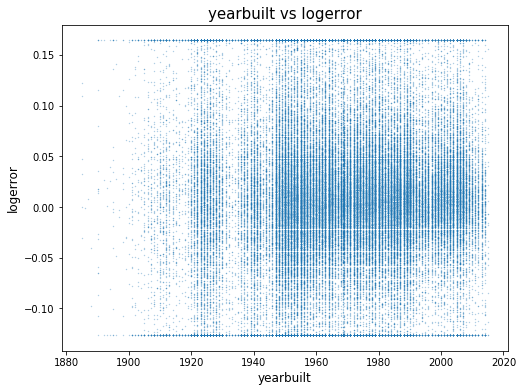

In [93]:
# year built
exploreCatePattern(data, 'yearbuilt', 'logerror')

### Save Data

In [94]:
data.to_csv("processed_data.csv")

In [95]:
data.head()

,parcelid,logerror,transactiondate,transaction_month,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,propertylandusetypeid_263.0,propertylandusetypeid_264.0,propertylandusetypeid_265.0,propertylandusetypeid_266.0,propertylandusetypeid_267.0,propertylandusetypeid_269.0,propertylandusetypeid_275.0,regionidcounty_1286.0,regionidcounty_2061.0,regionidcounty_3101.0
0,11016594,0.0276,2016-01-01,1,2.0,3.0,2.0,1684.0,1684.0,6037.0,...,0,0,0,0,0,0,0,0,0,1
1,14366692,-0.1267,2016-01-01,1,3.5,4.0,3.5,2263.0,2263.0,6059.0,...,0,0,0,0,0,0,0,1,0,0
2,12098116,-0.0040,2016-01-01,1,3.0,2.0,3.0,2217.0,2217.0,6037.0,...,0,0,0,0,0,0,0,0,0,1
3,12643413,0.0218,2016-01-02,1,2.0,2.0,2.0,839.0,839.0,6037.0,...,0,0,0,1,0,0,0,0,0,1
4,14432541,-0.0050,2016-01-02,1,2.5,4.0,2.5,2283.0,2283.0,6059.0,...,0,0,0,0,0,0,0,1,0,0
